In [ ]:
import geopandas as gpd
import fiona
import shapely.geometry
import shapely.wkt
import rasterio
from rasterio.plot import show
import numpy as np
import glob
import json
import pandas as pd
import folium
import geoplot.crs as gcrs

C:\Users\mrkntrci\AppData\Local\Temp\ipykernel_5000\275246824.py:1: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, if you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


# Shapely 

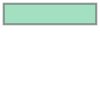

In [2]:
# Creating a polygon from Well Known Text
s_poly1 = shapely.wkt.loads("POLYGON ((0 0, 0 -2, 9 -2, 9 0, 0 0))")
s_poly1

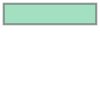

In [3]:
# Creating the same polygon from GeoJSON
from shapely.geometry import Polygon
geo = {'type': 'Polygon',
 'coordinates': [[[0, 0],
   [0, -2],
   [9, -2],
   [9, 0]]]}
Polygon([tuple(l) for l in geo['coordinates'][0]])

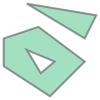

In [4]:
# Shapely Multi-Polygon
s_poly3 = shapely.wkt.loads("""
MULTIPOLYGON
(((50 40, 20 45, 45 30, 50 40)),
((25 35, 10 30, 10 18, 30 5, 45 20, 25 35), (32 20, 26 15, 20 25, 32 20)))
""")
s_poly3

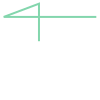

In [5]:
# Produce a Shapely LineString geometry from a list of coordinates
coords = [(5, -5.5), (5, 3), (-3, 0), (18, 0)]
line = shapely.geometry.LineString(coords)
line

In [6]:
s_poly3.area

737.5

In [23]:
line.length

38.04400374531753

In [24]:
s_poly3.bounds

(10.0, 5.0, 50.0, 45.0)

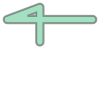

In [35]:
line.buffer(.9)

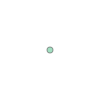

In [8]:
s_poly1.centroid

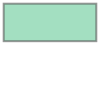

In [7]:
line.envelope

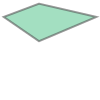

In [9]:
line.convex_hull

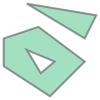

In [11]:
s_poly3.simplify(2)

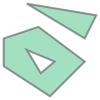

In [12]:
s_poly3.difference(s_poly1)

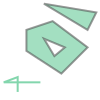

In [54]:
s_poly3.union(line)

In [55]:
s_poly3.intersection(line)

In [56]:
s_poly3.intersects(line)

False

# Rasterio

In [13]:
### Setting the data path
data_path = r'D:\Dropbox\Python\Applied-Geospatial-Data-Science-with-Python-main\Data'

# Setting the folder we want to write the output data to
out_path = r"D:\Dropbox\Python\Applied-Geospatial-Data-Science-with-Python-main\Data\Results"

In [14]:
# Reading Raster Data
lc = rasterio.open(data_path + "/test.tif", mode='r')
lc

<open DatasetReader name='D:/Dropbox/Python/Applied-Geospatial-Data-Science-with-Python-main/Data/test.tif' mode='r'>

In [92]:
lc.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': None,
 'width': 780,
 'height': 780,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(8.983152841195215e-05, 0.0, 26.387202987255236,
        0.0, -8.983152841195215e-05, 41.26195661934833)}

In [15]:
lc.colormap

<function DatasetReader.colormap>

In [97]:
lc.bounds

BoundingBox(left=26.387202987255236, bottom=41.19188802718701, right=26.45727157941656, top=41.26195661934833)

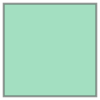

In [98]:
lc_bbox = shapely.geometry.box(*lc.bounds)
lc_bbox

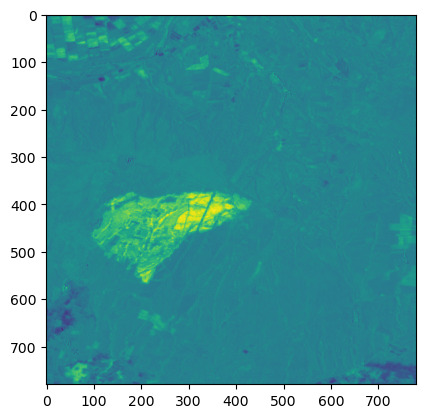

In [16]:
from rasterio.windows import from_bounds
from rasterio.enums import Resampling

left = 25.0
right = 27.0
top = 42.0
bottom = 40.0

with rasterio.open(data_path + "/test.tif") as src:
    rst = src.read(1, window=from_bounds(left, bottom, right, top, src.transform))
    show(rst)

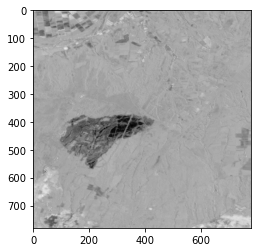

In [106]:
from rasterio.windows import from_bounds
from rasterio.enums import Resampling

left = 25.0
right = 27.0
top = 42.0
bottom = 40.0

with rasterio.open(data_path + "/test.tif") as src:
    rst = src.read(1, window=from_bounds(left, bottom, right, top, src.transform))
    show(rst, cmap="Greys")

# ipyleaflet

In [78]:
# Importing the packages
from ipyleaflet import (Map, GeoData, basemaps, WidgetControl, GeoJSON,
 LayersControl, Icon, Marker,basemap_to_tiles, Choropleth,
 MarkerCluster, Heatmap,SearchControl, 
 FullScreenControl)
from ipywidgets import Text, HTML

In [79]:
fires = pd.read_csv(data_path+ '/Fires.csv')

In [80]:
fires

,OBJECTID,prefire_end,postfire_start,yanan_alan,X,Y
0,54,7/24/2020,7/25/2020,142.40,26.422222,41.226944
1,21,9/9/2020,9/10/2020,52.40,26.928612,40.609444
2,55,7/22/2020,7/23/2020,31.30,26.921112,41.093056
3,314,8/4/2016,8/5/2016,25.31,27.225000,40.701946
4,7,9/27/2020,9/28/2020,19.58,29.366945,40.985279
...,...,...,...,...,...,...
172,378,9/10/2015,9/10/2015,0.50,27.116945,40.956944
173,390,8/31/2015,8/31/2015,0.50,27.271389,41.933613
174,403,8/7/2015,8/8/2015,0.50,26.583056,41.877777
175,540,4/11/2021,4/12/2021,0.50,28.080000,41.325001


In [91]:
fires_map = Map(
    basemap=basemap_to_tiles(basemaps.Esri.WorldImagery),
    center=(41.758057, 27.925278),
    zoom=8
)

fires_map

Map(center=[41.758057, 27.925278], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title',…

In [92]:
!conda install -c conda-forge ipyleaflet

^C


In [84]:
# Mapping the attractions

for (index, row) in fires.iterrows():
    marker = Marker(location = [row.loc['Y'], row.loc['X']])
    fires_map.add_layer(marker)

In [85]:
fires_map

Map(center=[41.758057, 27.925278], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title',…

In [21]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

C:\Users\mrkntrci\AppData\Local\Temp\ipykernel_5000\3926210268.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [148]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,KOS,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [146]:
pop_map = folium.Map()

folium.
folium.Choropleth(
    geo_data=world,
    name="Population Choropleth map",
    data=world,
    columns=["name","pop_est","gdp_md_est"],
    key_on="feature.properties.name",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Estimated Popuilation",
).add_to(pop_map)

folium.LayerControl().add_to(pop_map)

pop_map

# Geoplot

In [17]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

C:\Users\mrkntrci\AppData\Local\Temp\ipykernel_5000\3926210268.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [18]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


<GeoAxes: >

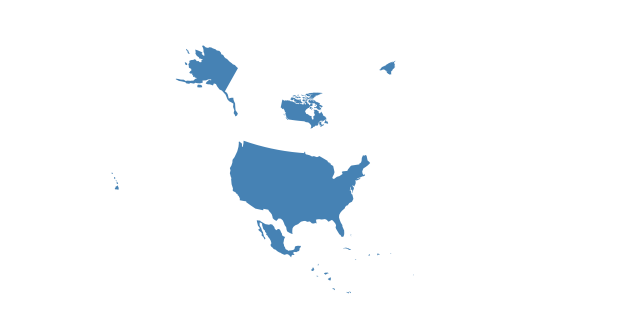

In [34]:
import geoplot as gplt
gplt.cartogram(world[world['continent']=="North America"], scale='pop_est',
projection=gcrs.AlbersEqualArea())

In [36]:
import geoplot as gplt

# load the example data
nyc_boroughs = gpd.read_file(gplt.datasets.get_path('nyc_boroughs'))
nyc_boroughs

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330385.03697,1.623853e+09,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
1,4,Queens,861038.47930,3.049947e+09,"MULTIPOLYGON (((-73.83668 40.59495, -73.83678 ..."
2,3,Brooklyn,726568.94634,1.959432e+09,"MULTIPOLYGON (((-73.86706 40.58209, -73.86769 ..."
3,1,Manhattan,358532.95642,6.364422e+08,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
4,2,Bronx,464517.89055,1.186804e+09,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."


CPU times: total: 62.5 ms
Wall time: 55 ms


<Axes: >

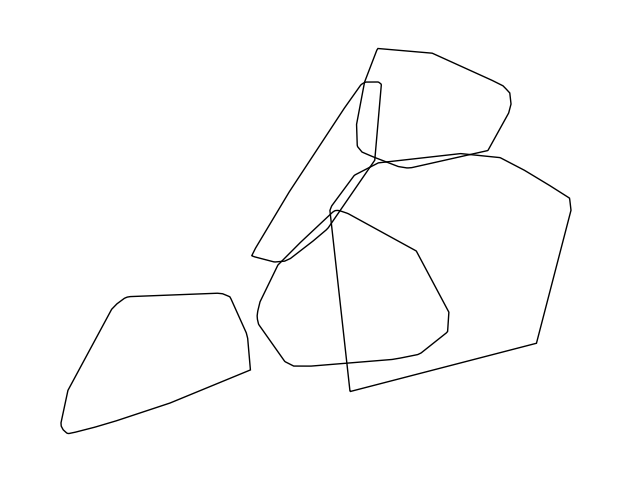

In [38]:
%time gplt.polyplot(nyc_boroughs.geometry.map(lambda shp: shp.convex_hull))

# Geoviews

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
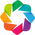

In [39]:
import geoviews as gv
import geoviews.feature as gf
from cartopy import crs
gv.extension('bokeh', 'matplotlib')

In [ ]:
# ( gf.ocean * gf.land * gf.coastline * gf.borders).opts(
'Feature', projection=crs.Geostationary(), global_extent=True, height=275)

Datashader

In [44]:
import datashader as ds, pandas as pd, colorcet
df  = pd.read_csv('Fires.csv')
cvs = ds.Canvas(plot_width=850, plot_height=500)
agg = cvs.points(df, 'X', 'Y')
img = ds.tf.shade(agg, cmap=colorcet.agg, how='log')

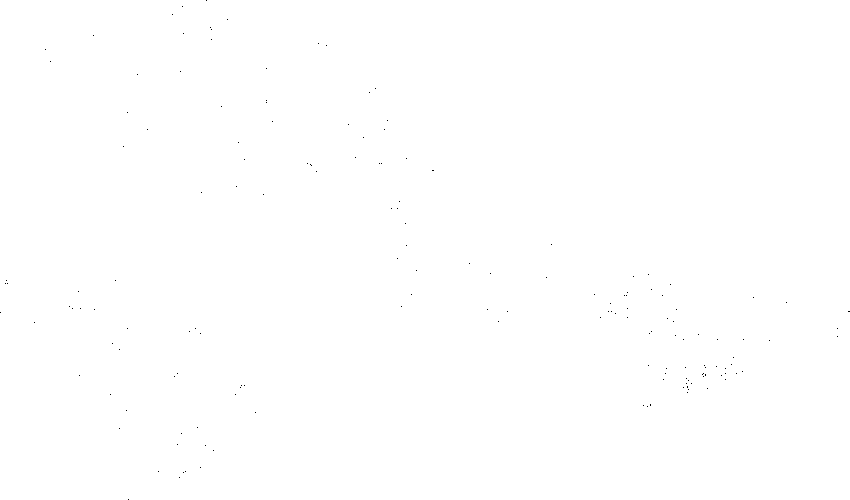

In [46]:
img

    Pandas

In [47]:
#Selectiong a columg
df['postfire_start']

0      7/25/2020
1      9/10/2020
2      7/23/2020
3       8/5/2016
4      9/28/2020
         ...    
172    9/10/2015
173    8/31/2015
174     8/8/2015
175    4/12/2021
176    5/17/2021
Name: postfire_start, Length: 177, dtype: object

In [57]:
#Selecting via row number
df.loc[ 55]

OBJECTID                312
prefire_end        8/7/2016
postfire_start     8/7/2016
yanan_alan              1.5
X                 29.404722
Y                  40.96611
Name: 55, dtype: object

In [60]:
df[0:5]

,OBJECTID,prefire_end,postfire_start,yanan_alan,X,Y
0,54,7/24/2020,7/25/2020,142.40,26.422222,41.226944
1,21,9/9/2020,9/10/2020,52.40,26.928612,40.609444
2,55,7/22/2020,7/23/2020,31.30,26.921112,41.093056
3,314,8/4/2016,8/5/2016,25.31,27.225000,40.701946
4,7,9/27/2020,9/28/2020,19.58,29.366945,40.985279


In [62]:
df.head()

,OBJECTID,prefire_end,postfire_start,yanan_alan,X,Y
0,54,7/24/2020,7/25/2020,142.40,26.422222,41.226944
1,21,9/9/2020,9/10/2020,52.40,26.928612,40.609444
2,55,7/22/2020,7/23/2020,31.30,26.921112,41.093056
3,314,8/4/2016,8/5/2016,25.31,27.225000,40.701946
4,7,9/27/2020,9/28/2020,19.58,29.366945,40.985279


In [63]:
df.tail()

,OBJECTID,prefire_end,postfire_start,yanan_alan,X,Y
172,378,9/10/2015,9/10/2015,0.5,27.116945,40.956944
173,390,8/31/2015,8/31/2015,0.5,27.271389,41.933613
174,403,8/7/2015,8/8/2015,0.5,26.583056,41.877777
175,540,4/11/2021,4/12/2021,0.5,28.080000,41.325001
176,558,5/17/2021,5/17/2021,0.5,27.925278,41.758057


In [64]:
df.describe()

,OBJECTID,yanan_alan,X,Y
count,177.000000,177.000000,177.000000,177.000000
mean,230.259887,3.037219,28.201037,41.205827
std,142.656255,11.742699,1.016623,0.338034
min,1.000000,0.500000,26.394444,40.609444
25%,117.000000,0.600000,27.248056,40.956390
50%,216.000000,1.000000,28.080000,41.123333
75%,322.000000,1.910000,29.229723,41.450554
max,559.000000,142.400000,29.918888,42.017223


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OBJECTID        177 non-null    int64  
 1   prefire_end     177 non-null    object 
 2   postfire_start  177 non-null    object 
 3   yanan_alan      177 non-null    float64
 4   X               177 non-null    float64
 5   Y               177 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 8.4+ KB


In [75]:
dc_attractions_gpd = pd.read_csv( 'DC_Attractions.csv')
final_gpd = dc_attractions_gpd.merge(dc_attractions[['Attraction']],
how='left',left_index=True, right_index = True)
final_gpd.head()

,Attraction_x,Address,Attraction_y
0,Washington Monument,"2 15th St NW, Washington, DC 20024",Washington Monument
1,Smithsonian National Air and Space Museum,"600 Independence Ave SW, Washington, DC 20560",Smithsonian National Air and Space Museum
2,White House,"1600 Pennsylvania Avenue NW, Washington, DC 20500",White House
